<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/1026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## d2l Chapter 3

In [0]:
!pip install mxnet
import mxnet

In [0]:
from mxnet import nd 
from time import time 

a = nd.ones(shape=1000)
b = nd.ones(shape=1000)

In [0]:
start = time()
c = nd.zeros(shape=1000)
for i in range(1000):
    c[i] = a[i] + b[i]
time() - start

0.19153738021850586

In [0]:
start = time()
d = a + b 
time() - start

0.0010044574737548828

In [0]:
a = nd.ones(shape=3)
b = 10 
a + b


[11. 11. 11.]
<NDArray 3 @cpu(0)>

In [0]:
from IPython import display 
import matplotlib.pyplot as plt 
from mxnet import autograd, nd 
import random
%matplotlib inline 

In [0]:
num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4]
true_b = 4.2 
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b 
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [0]:
features[0], labels[0]

(
 [2.2122064 0.7740038]
 <NDArray 2 @cpu(0)>, 
 [6.000587]
 <NDArray 1 @cpu(0)>)

In [0]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

In [0]:
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

In [0]:
help(plt.rcParams)

Help on RcParams in module matplotlib object:

class RcParams(collections.abc.MutableMapping, builtins.dict)
 |  A dictionary object including validation
 |  
 |  validating functions are defined and associated with rc parameters in
 |  :mod:`matplotlib.rcsetup`
 |  
 |  Method resolution order:
 |      RcParams
 |      collections.abc.MutableMapping
 |      collections.abc.Mapping
 |      collections.abc.Collection
 |      collections.abc.Sized
 |      collections.abc.Iterable
 |      collections.abc.Container
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |      Yield sorted list of keys.
 |  
 |  __len__(self)
 |      Return len(self).
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __setitem__(self, key, val)
 |      Set self[key] to value.

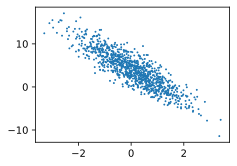

In [0]:
set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1)

In [0]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [0]:
batch_size = 10 
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-1.2064103  -0.5134857 ]
 [-0.09838036 -0.08484158]
 [ 0.69178855 -0.20333089]
 [ 0.3717077   0.9300072 ]
 [ 0.20530048 -1.9531958 ]
 [-0.42326602 -0.60970175]
 [-0.3075374   1.2168936 ]
 [ 0.7936089  -1.1430973 ]
 [-0.03442945 -0.11181278]
 [-0.08512726 -0.90995044]]
<NDArray 10x2 @cpu(0)> 
[ 3.5305307  4.2787137  6.270785   1.7626053 11.2608595  5.427304
 -0.5507884  9.676742   4.515723   7.1249194]
<NDArray 10 @cpu(0)>


In [0]:
for i in range(0, 100, 10):
    print(i)

0
10
20
30
40
50
60
70
80
90


In [0]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1, ))

In [0]:
w.attach_grad()
b.attach_grad()

In [0]:
def linreg(X, w, b):
    return nd.dot(X, w) + b 

In [0]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 

In [0]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size 

In [0]:
lr = 0.03 
num_epochs = 3 
net = linreg 
loss = squared_loss 

In [0]:
for epoch in range(num_epochs):
    for X , y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch+1, train_l.mean().asnumpy()))

epoch 1, loss 0.040601
epoch 2, loss 0.000153
epoch 3, loss 0.000051


In [0]:
true_w, w

([2, -3.4], 
 [[ 1.9993225]
  [-3.3996203]]
 <NDArray 2x1 @cpu(0)>)

In [0]:
true_b, b

(4.2, 
 [4.1992807]
 <NDArray 1 @cpu(0)>)

In [0]:
from mxnet import autograd, nd 

num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4]
true_b = 4.2 
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b 
labels += nd.random.normal(scale=0.01, shape=labels.shape)

# num_inputs = 2 
# num_examples = 1000 
# true_w = [2, -3.4]
# true_b = 4.2 
# features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
# labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
# labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [0]:
features[:10, 0]


[-0.34304565  0.5086958  -0.491778   -0.15748753 -0.17884982  0.46760127
  0.7615899  -0.5143139  -0.11494298  1.1116904 ]
<NDArray 10 @cpu(0)>

In [0]:

features[:10, 1]


[-4.0720204e-01  9.1511744e-01 -1.5560924e+00 -5.2664566e-01
  4.3164727e-01  1.7287086e-01  9.9106313e-05  1.7198472e+00
  1.5617702e+00  1.4935805e+00]
<NDArray 10 @cpu(0)>

In [0]:
labels[:10]


[ 4.902419   2.1094513  8.48928    5.673833   2.384568   4.539225
  5.7347293 -2.681284  -1.342022   1.3345029]
<NDArray 10 @cpu(0)>

In [0]:
from mxnet.gluon import data as gdata

batch_size = 10 
dataset = gdata.ArrayDataset(features, labels)
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

In [0]:
for X, y in data_iter:
    print(X, y)
    break


[[ 5.8620876e-01 -1.2303159e+00]
 [ 2.0478384e+00 -5.9704506e-01]
 [ 1.6750511e+00 -5.1154160e-01]
 [-9.5759124e-01 -1.6360582e-01]
 [-1.1594498e+00 -1.6610742e+00]
 [-4.0538169e-02 -1.1355679e-01]
 [ 3.7723605e-02  7.1895683e-01]
 [-3.6949554e-04 -6.8584454e-01]
 [ 1.0389107e+00 -1.6013620e+00]
 [-5.8955443e-01 -5.7735205e-01]]
<NDArray 10x2 @cpu(0)> 
[ 9.5580845 10.314247   9.272762   2.8271055  7.521756   4.506869
  1.8416282  6.552679  11.740247   4.978527 ]
<NDArray 10 @cpu(0)>


In [0]:
from mxnet.gluon import nn 

net = nn.Sequential()

In [0]:
net.add(nn.Dense(1))

In [0]:
from mxnet import init 

net.initialize(init.Normal(sigma=0.01))

In [0]:
from mxnet.gluon import loss as gloss 

loss = gloss.L2Loss()

In [0]:
from mxnet import gluon 

In [0]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

In [0]:
num_epochs = 20
for epoch in range(1, num_epochs + 1):
    for i, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
    l = loss(net(features), labels)
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 5.061691
epoch 2, loss: 5.533369
epoch 3, loss: 6.879493
epoch 4, loss: 6.334496
epoch 5, loss: 8.212176
epoch 6, loss: 7.439948
epoch 7, loss: 7.466348
epoch 8, loss: 8.417274
epoch 9, loss: 8.601858
epoch 10, loss: 7.198522
epoch 11, loss: 6.927907
epoch 12, loss: 7.851274
epoch 13, loss: 8.246639
epoch 14, loss: 8.035029
epoch 15, loss: 8.349236
epoch 16, loss: 7.813134
epoch 17, loss: 6.822441
epoch 18, loss: 7.859071
epoch 19, loss: 8.180382
epoch 20, loss: 8.247910


In [0]:
dense = net[0]
true_w, dense.weight.data())

([2, -3.4], 
 [[0.03979441 0.11555748]]
 <NDArray 1x2 @cpu(0)>)

In [0]:
!pip install d2lzh

import d2lzh as d2l

In [0]:
from mxnet.gluon import data as gdata

In [0]:
import sys 
import time 
%matplotlib inline 